# Why Does the World Need ReLU ?

--- 


### Before ReLU 

- Before instead of relu there two activation names sigmoid and tanh that can similar job as ReLU.

- But there is limitation to sigmoid and tanh that it gets saturated to 1. Tanh also get saturated to -1.

- This saturation cuase the biggest problem that is vanshshing gradient descent.

---

### what is this saturation problem : (notes below)

---

#### Sigmoid 

The sigmoid :

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

- For large positive inputs, $x$ (e.g., $x > 5$), $e^{-x}$ approaches 0, making $\sigma(x)$ approach 1.
- For large negative inputs, $x$ (e.g., $x < -5$), $e^{-x}$ becomes very large, making $\sigma(x)$ approach 0.

##### Example:

let $x = 10$ and $x = -10$.

- For $x = 10$:
  $$ \sigma(10) = \frac{1}{1 + e^{-10}} \approx \frac{1}{1 + 0.000045} \approx 1 $$
  
- For $x = -10$:
  $$ \sigma(-10) = \frac{1}{1 + e^{10}} \approx \frac{1}{1 + 22026.47} \approx 0 $$

- In both cases, the output of the sigmoid function is very close to its extremes (0 or 1). Changing in $x$ around these values will not affect that much change in output, it will the gradient very small durng backpropagation.

--- 

#### Tanh 

The tanh function :

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

- For large positive inputs, $x$ (e.g., $x > 3$), $e^{-x}$ approaches 0, making $\tanh(x)$ approach 1.
- For large negative inputs, $x$ (e.g., $x < -3$), $e^x$ approaches 0, making $\tanh(x)$ approach -1.

##### Example:

Consider the inputs $x = 5$ and $x = -5$.

- For $x = 5$:
  $$ \tanh(5) = \frac{e^5 - e^{-5}}{e^5 + e^{-5}} \approx \frac{148.41 - 0.0067}{148.41 + 0.0067} \approx 1 $$
  
- For $x = -5$:
  $$ \tanh(-5) = \frac{e^{-5} - e^5}{e^{-5} + e^5} \approx \frac{0.0067 - 148.41}{0.0067 + 148.41} \approx -1 $$

Again, the outputs are very close to the extremes (-1 or 1), making the gradient very small for large or small inputs.

--- 

#### Saturation 

- When a neuron in a neural network enters the saturation area, the derivative of the activation function (which is used to update the weights during backpropagation) becomes very small.

---
#### Sigmoid Derivative:

$$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$

For $x = 10$ and $x = -10$:
- $\sigma(10) \approx 1$ $\Rightarrow \sigma'(10) \approx 0$
- $\sigma(-10) \approx 0$ $\Rightarrow \sigma'(-10) \approx 0$

--- 

#### Tanh Derivative:

$$ \tanh'(x) = 1 - \tanh^2(x) $$

For $x = 5$ and $x = -5$:
- $\tanh(5) \approx 1$ $\Rightarrow \tanh'(5) \approx 0$
- $\tanh(-5) \approx -1$ $\Rightarrow \tanh'(-5) \approx 0$

---

- When these derivatives are close to zero, the weight updates during backpropagation become negligible, and the network stops learning effectively. This is known as the **vanishing gradient problem**.

- **Sigmoid and tanh functions saturate** for large positive or negative inputs, causing their outputs to approach 1 or 0 (for sigmoid) and 1 or -1 (for tanh).
- **Gradients become very small** in these range, making it difficult for the network to update weights and it will not learn that much.

- So this is why world needs ReLU as a alternative activation functions, which do not saturate as easily, have become popular in deep learning.

---

## ReLU 

- ReLU is activation function. And activation takes the sum-weighted input from the neuron and ouput it by applying the its function.

- The rectified linear activation function or ReLU for short is a piecewise linear function that will
output the input directly if it is positive, otherwise, it will output zero.(img-below)

- Relu has become the default activation function for nn model.

- ReLU is easy to train and gives best performance.

---

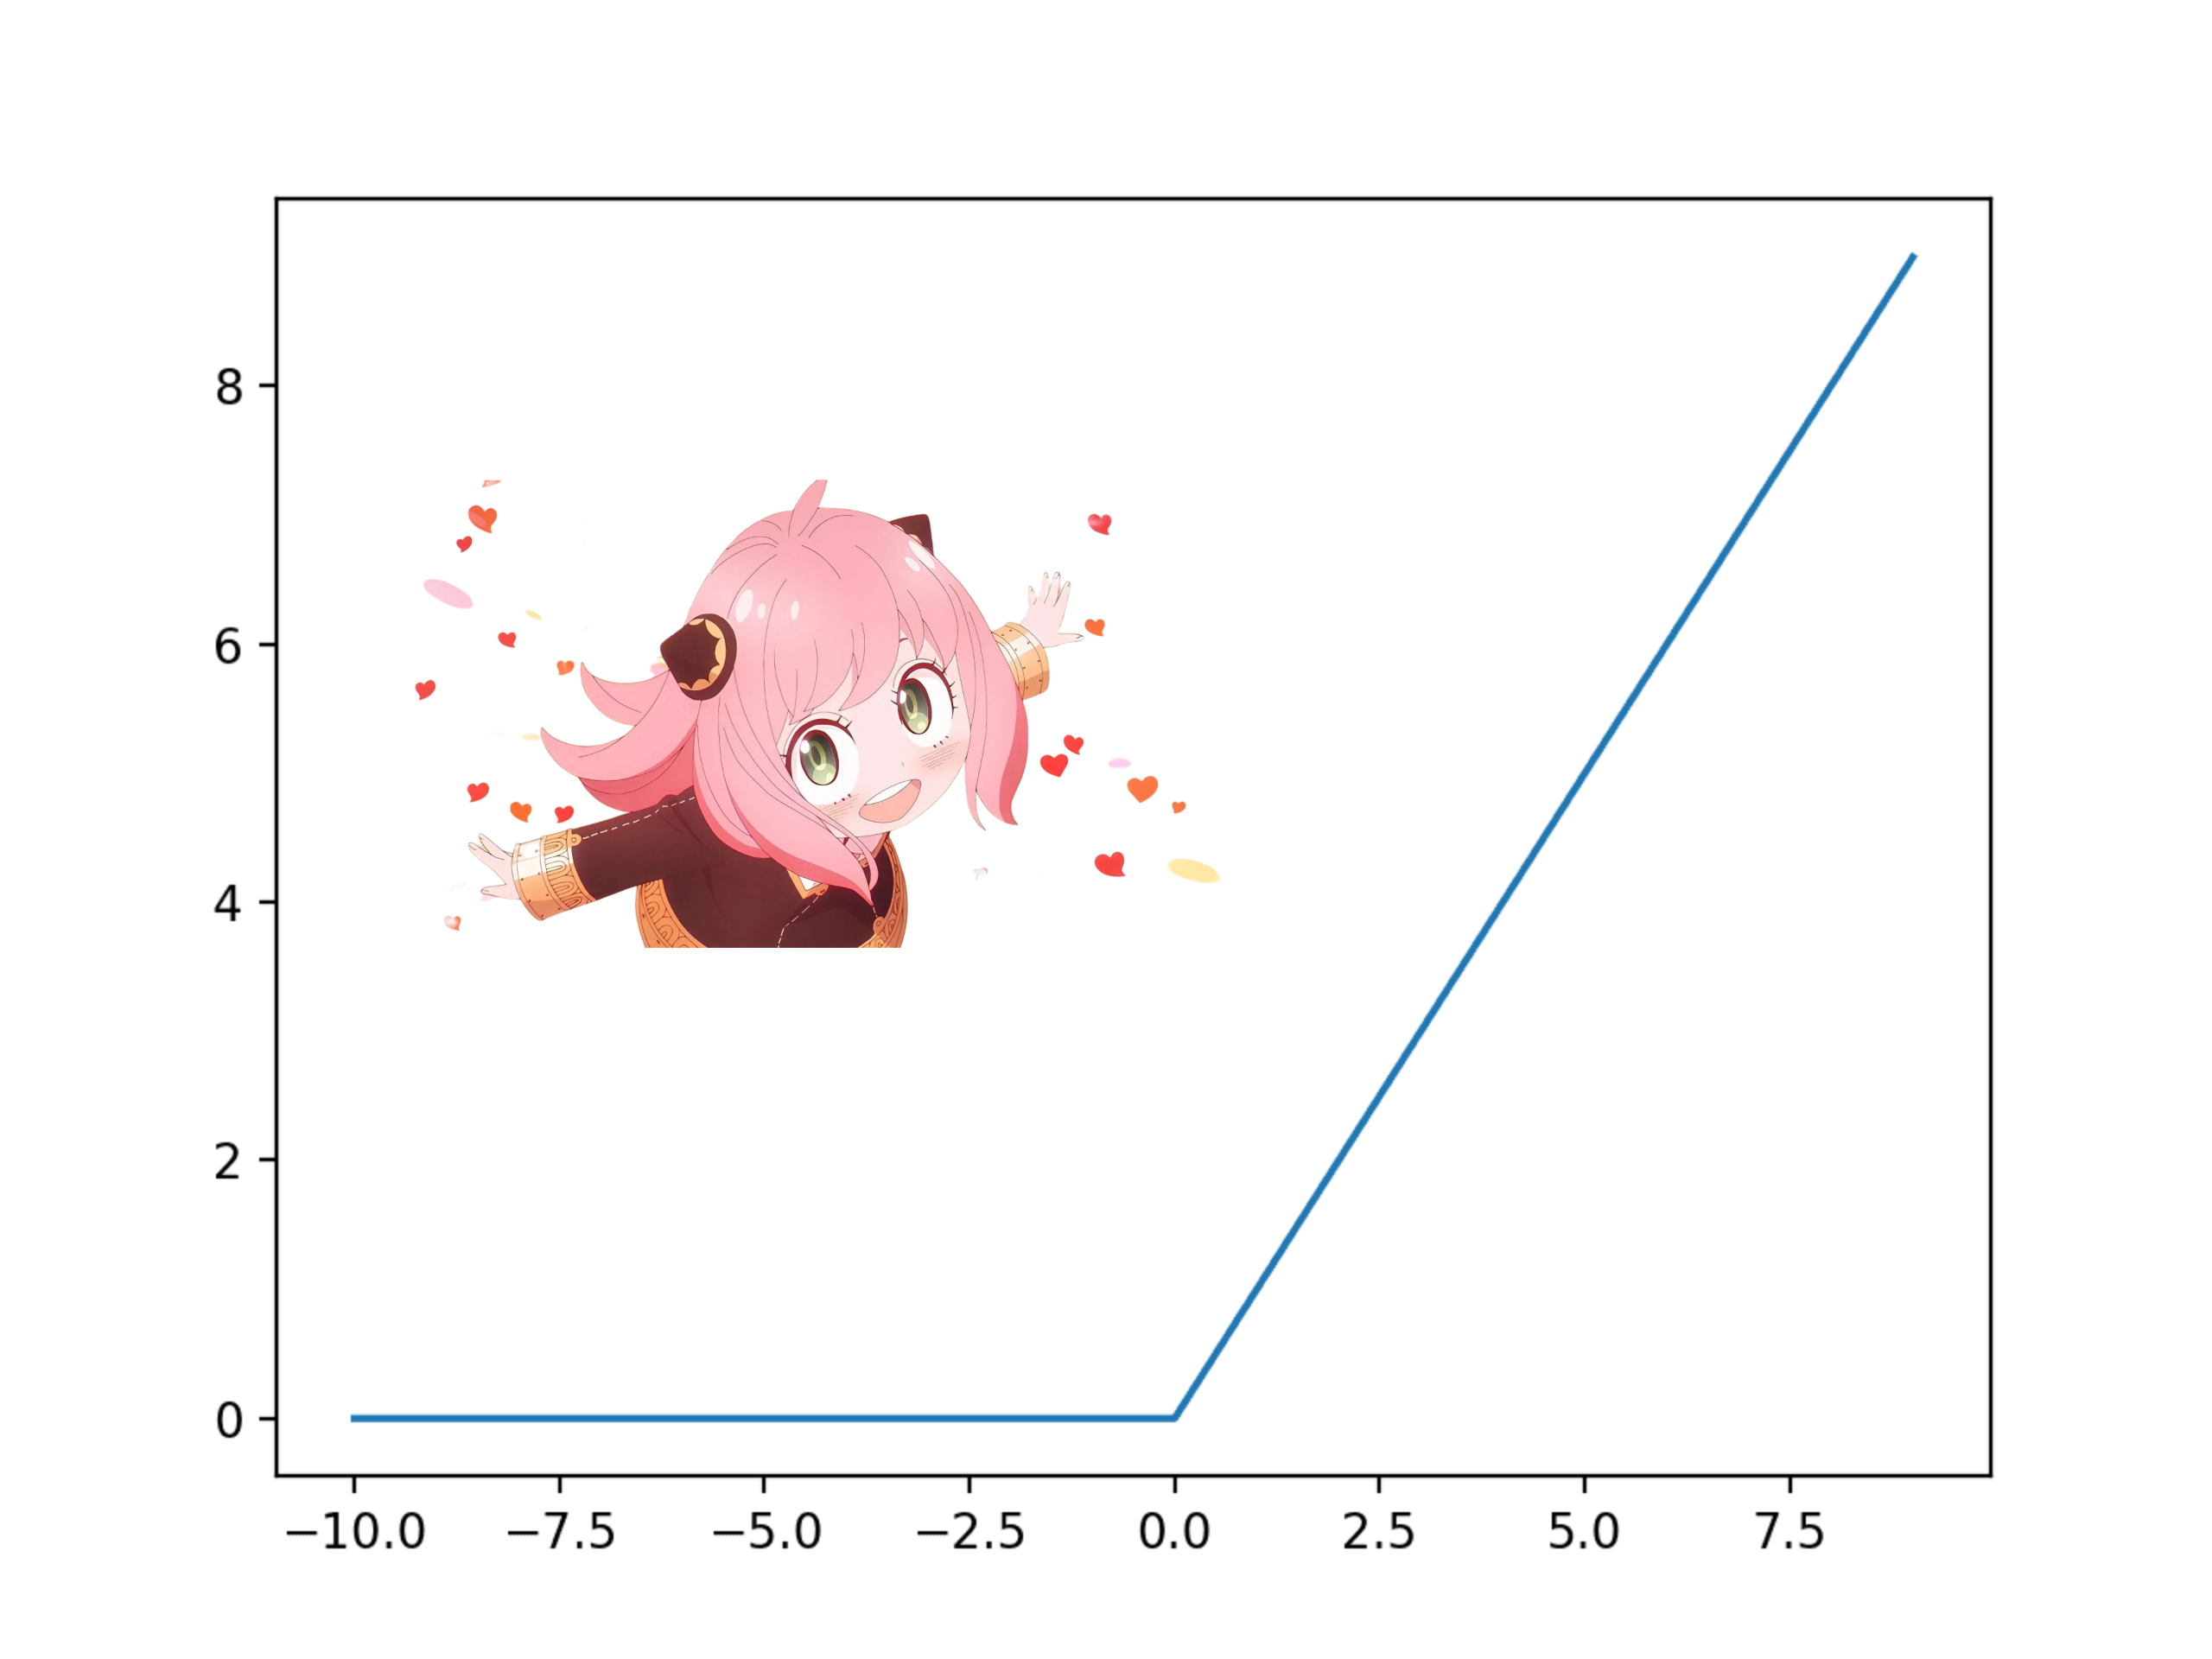

--- 

## Lest Uderstand the math behind ReLU ! 

### ReLU 

The Rectified Linear Unit (ReLU) activation function is defined as:
$$ \text{ReLU}(x) = \max(0, x) $$
- For inputs greater than 0, ReLU returns the input value.
- For inputs less than or equal to 0, ReLU returns 0.

--- 

#### Example:
Consider the inputs $x = 10$, $x = -10$, and $x = 0$.
- For $x = 10$:
  $$ \text{ReLU}(10) = \max(0, 10) = 10 $$
  
- For $x = -10$:
  $$ \text{ReLU}(-10) = \max(0, -10) = 0 $$
- For $x = 0$:
  $$ \text{ReLU}(0) = \max(0, 0) = 0 $$

--- 

### Derivative of ReLU
The derivative of the ReLU function is straightforward:
$$ \text{ReLU}'(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0 
\end{cases}
$$

--- 

#### Saturation

- so its not saturate for positive inputs.

- **Non-positive Inputs**: For $x \leq 0$, the derivative is 0, which can cause the "dying ReLU" problem where neurons can get stuck during training and stop learning.

--- 

### Leaky ReLU

The Leaky Rectified Linear Unit (Leaky ReLU) is a variation of ReLU designed to solve the "dying ReLU" problem.

Leaky RELU : 

$$ \text{Leaky ReLU}(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0 
\end{cases}
$$
where $\alpha$ is a small positive constant (e.g., 0.01).

--- 

#### Example:
Consider the inputs $x = 10$, $x = -10$, and $x = 0$ with $\alpha = 0.01$.
- For $x = 10$:
  $$ \text{Leaky ReLU}(10) = 10 $$
  
- For $x = -10$:
  $$ \text{Leaky ReLU}(-10) = 0.01 \times (-10) = -0.1 $$
- For $x = 0$:
  $$ \text{Leaky ReLU}(0) = 0 $$

### Derivative of Leaky ReLU
The derivative of the Leaky ReLU function is:
$$ \text{Leaky ReLU}'(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0 
\end{cases}
$$

--- 


#### Saturation and Learning

- **Positive Inputs**: For $x > 0$, the derivative is 1, similar to ReLU, allowing gradients to flow without vanishing like ReLU.

- **Non-positive Inputs**: For $x \leq 0$, the derivative is $\alpha$, a small positive value, which prevents the gradient from becoming zero and allows some useful gradient update to happen.


--- 

### Inshort

--- 

#### ReLU:

- **Advantages**: 

  - Does not saturate for positive inputs.

  - Efficient computation.
  - Helps throw out the vanishing gradient problem for positive inputs.(this problem occure in sigmoid and tanh)

- **Disadvantages**: 

  - "Dying ReLU" problem for $x \leq 0$.

--- 

#### Leaky ReLU:

- **Advantages**: 
  - Mitigates the "dying ReLU" problem by allowing a small gradient for $x \leq 0$.

  - Does not saturate for positive inputs.

- **Disadvantages**: 

  - Still relatively simple and might not capture complex patterns as well as some other advanced activation functions.

--- 

### Comparison with Sigmoid and Tanh:

- **Sigmoid and Tanh**:

  - Saturate at extreme values -> vanishing gradients.

  - Limited sensitivity to inputs far from the mid-point.
  
- **ReLU and Leaky ReLU**:

  - ReLU does not saturate for positive inputs, but can "die" for non-positive inputs.

  - Leaky ReLU solve  the "dying ReLU" issue by allowing a small gradient for non-positive inputs.

  - Both are generally more effective for training deep networks due to better gradient flow.

So to maintin gradient flow in training deep neural network the world needs ReLU. 

--- 

## Read more, Learn More and Build more

#### Reding List :


#### Videos :

---

# Code 

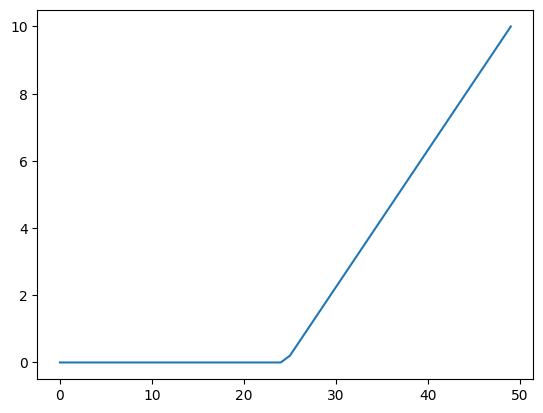

In [24]:
# data 
import numpy as np 
import matplotlib.pyplot as plt 

X = np.linspace(-10,10)

def ReLU(x):
    return max(x,0)

y_relu = [ReLU(i) for i in X ]

plt.plot(y_relu)

In [25]:
print("ReLU :", y_relu) 

ReLU : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.204081632653061, 0.612244897959183, 1.0204081632653068, 1.4285714285714288, 1.8367346938775508, 2.2448979591836746, 2.6530612244897966, 3.0612244897959187, 3.4693877551020407, 3.8775510204081627, 4.2857142857142865, 4.6938775510204085, 5.1020408163265305, 5.510204081632654, 5.918367346938776, 6.326530612244898, 6.73469387755102, 7.142857142857142, 7.551020408163264, 7.95918367346939, 8.367346938775512, 8.775510204081634, 9.183673469387756, 9.591836734693878, 10.0]


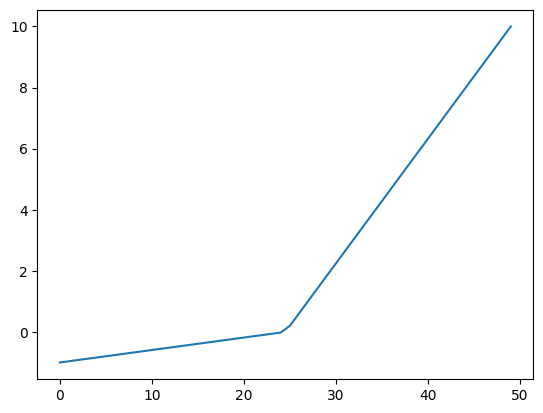

In [26]:
# LeakyReLU 

def LeakyReLU(x):
    return max(x,x*0.1)

y = [LeakyReLU(i) for i in X]

plt.plot(y)

In [27]:
print("ReLU :", y_relu) 
print("LeakyReLU :", y) 

ReLU : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.204081632653061, 0.612244897959183, 1.0204081632653068, 1.4285714285714288, 1.8367346938775508, 2.2448979591836746, 2.6530612244897966, 3.0612244897959187, 3.4693877551020407, 3.8775510204081627, 4.2857142857142865, 4.6938775510204085, 5.1020408163265305, 5.510204081632654, 5.918367346938776, 6.326530612244898, 6.73469387755102, 7.142857142857142, 7.551020408163264, 7.95918367346939, 8.367346938775512, 8.775510204081634, 9.183673469387756, 9.591836734693878, 10.0]
LeakyReLU : [-1.0, -0.9591836734693878, -0.9183673469387756, -0.8775510204081632, -0.8367346938775511, -0.7959183673469389, -0.7551020408163266, -0.7142857142857143, -0.6734693877551021, -0.6326530612244898, -0.5918367346938775, -0.5510204081632653, -0.5102040816326531, -0.4693877551020409, -0.4285714285714286, -0.3877551020408163, -0.3469387755102041, -0.3061224489795919, -0.2653061224489796, -0.2244897959183673, -0.18367346938775508, -0.142

- As you can see in the output of ReLU negative values disappear but not in LeakyReLU.